In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [23]:
#LOAD TEXT
#Save notepad as UTF-8 (select from dropdown during saving)
filename = "data.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:500])

the project gutenberg ebook of the jungle book, by rudyard kipling

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: the jungle book

author: rudyard kipling

release date: january 16, 2006 [ebook #236]
last updated: october 6, 2016

language: english

character set encoding: utf-8

*** sta


In [24]:
#CLEAN TEXT
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())

#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character

#Character sequences must be encoded as integers. 
#Each unique character will be assigned an integer value. 
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [25]:
# summarize the data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  292868
Total Vocab:  50


In [26]:
seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few. 
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

Number of sequences: 29281


In [27]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])

(29281, 60, 50)
(29281, 50)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False False]
 [False False False False False False F

In [28]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
Total params: 98,098
Trainable params: 98,098
Non-trainable params: 0
_________________________________________________________________


In [29]:
# define the checkpoint
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

In [30]:
# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,   
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/50
229/229 [==============================] - ETA: 0s - loss: 2.5115
Epoch 00001: loss improved from inf to 2.51146, saving model to saved_weights\saved_weights-01-2.5115.hdf5
229/229 [==============================] - 17s 76ms/step - loss: 2.5115
Epoch 2/50
229/229 [==============================] - ETA: 0s - loss: 2.0282
Epoch 00002: loss improved from 2.51146 to 2.02823, saving model to saved_weights\saved_weights-02-2.0282.hdf5
229/229 [==============================] - 18s 77ms/step - loss: 2.0282
Epoch 3/50
229/229 [==============================] - ETA: 0s - loss: 1.8327
Epoch 00003: loss improved from 2.02823 to 1.83267, saving model to saved_weights\saved_weights-03-1.8327.hdf5
229/229 [==============================] - 18s 78ms/step - loss: 1.8327
Epoch 4/50
229/229 [==============================] - ETA: 0s - loss: 1.6878
Epoch 00004: loss improved from 1.83267 to 1.68779, saving model to saved_weights\saved_weights-04-1.6878.hdf5
229/229 [===========================

Epoch 33/50
229/229 [==============================] - ETA: 0s - loss: 0.7902
Epoch 00033: loss improved from 0.79253 to 0.79018, saving model to saved_weights\saved_weights-33-0.7902.hdf5
229/229 [==============================] - 19s 82ms/step - loss: 0.7902
Epoch 34/50
229/229 [==============================] - ETA: 0s - loss: 0.7758
Epoch 00034: loss improved from 0.79018 to 0.77581, saving model to saved_weights\saved_weights-34-0.7758.hdf5
229/229 [==============================] - 18s 77ms/step - loss: 0.7758
Epoch 35/50
229/229 [==============================] - ETA: 0s - loss: 0.7598
Epoch 00035: loss improved from 0.77581 to 0.75976, saving model to saved_weights\saved_weights-35-0.7598.hdf5
229/229 [==============================] - 19s 81ms/step - loss: 0.7598
Epoch 36/50
229/229 [==============================] - ETA: 0s - loss: 0.7468
Epoch 00036: loss improved from 0.75976 to 0.74681, saving model to saved_weights\saved_weights-36-0.7468.hdf5
229/229 [===================

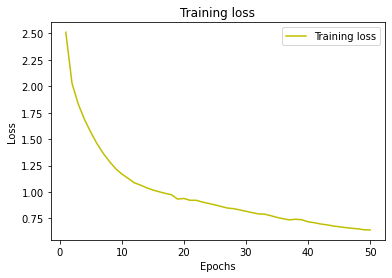

In [33]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [36]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)



----- Seed for our text prediction: "t
of a hook-and-eye fastening. he was afraid for the minute,"


In [37]:
for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

” said the jungle. sham the sea look
helves would cin to-titi-tle find the
lust grop, and we cungaraled miger-tundra. this was their dy. sheather.  what because he
naughe. then you canyighling. the man’y elephants to
shill as sirven the dark; and
the firnding hand o” mongars, should sides.”

rikitioks weather, darze.” bugat--was siacing up where khan he man under answays into don’t foot?” bring br


In [32]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.
